# 1. Read the dataset to the python environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\ICT kerala\week14_unsupervised\Wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Data has no missing values

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

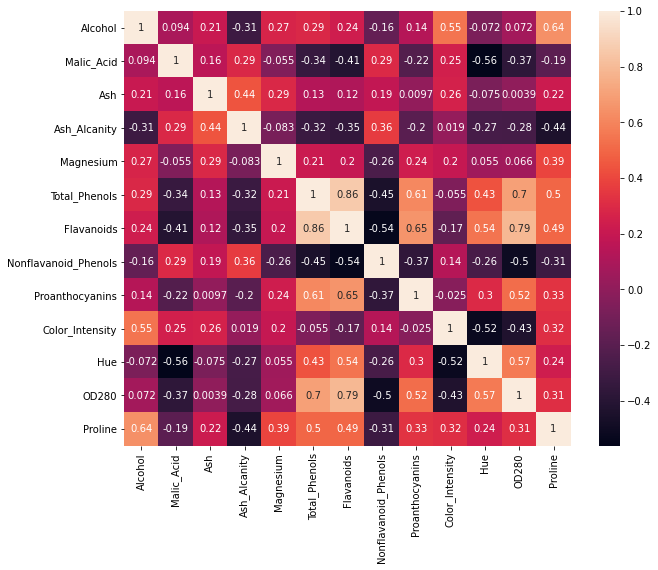

In [7]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)

No two variables are having a correlaion higher than 0.9 or lower than -0.9. Hence the variables are not highly correlated with each other.

#### Boxplot

For finding the presence of outliers in the dataset

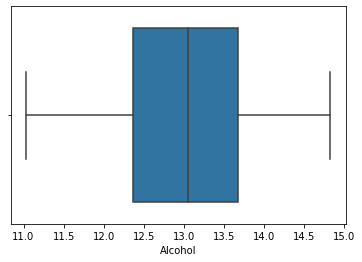

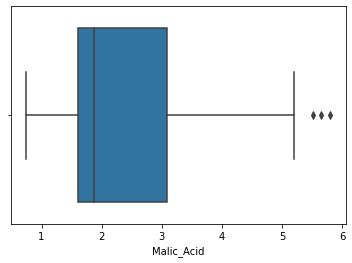

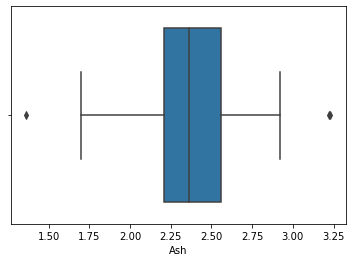

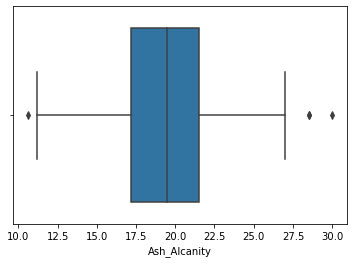

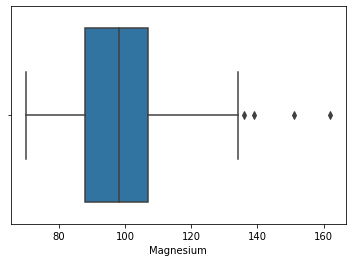

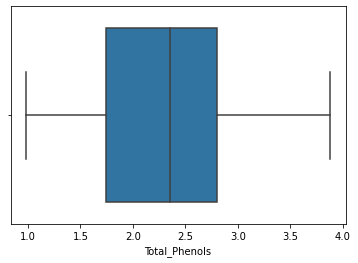

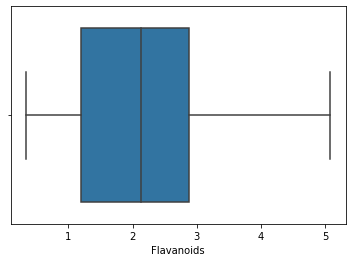

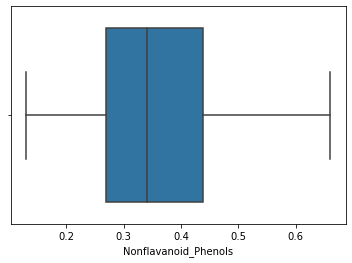

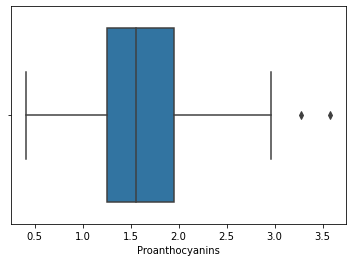

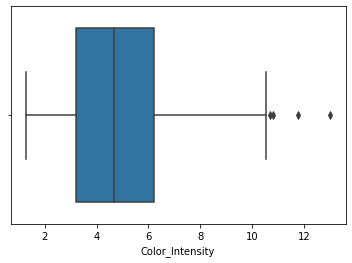

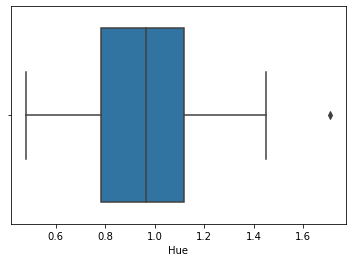

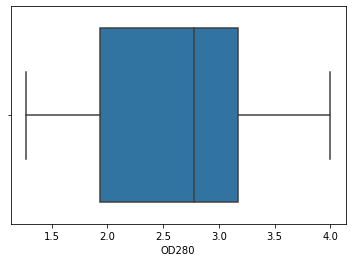

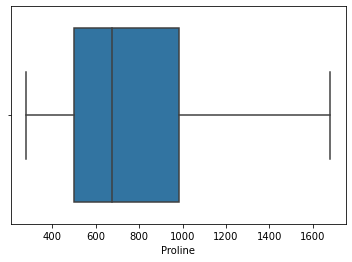

In [8]:
for x in data.columns:
    sns.boxplot(data[x])
    plt.show()

There are outliers in some of the variables: malic acid, ash, ash alcanity, magnesium, proanthocyanins

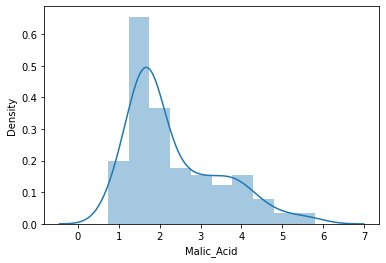

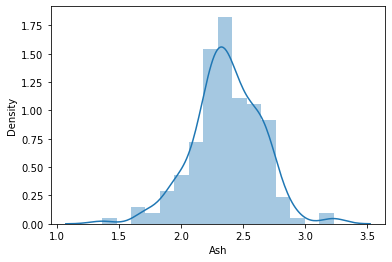

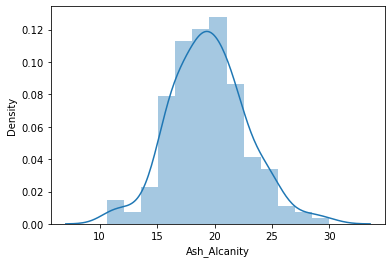

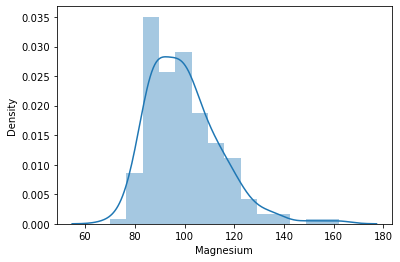

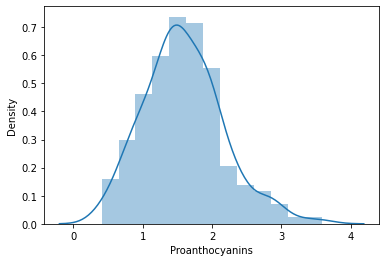

In [9]:
l = ['Malic_Acid','Ash','Ash_Alcanity','Magnesium','Proanthocyanins']
for x in l:
    sns.distplot(data[x])
    plt.show()

Since the variables are skewed and having outliers we can use percentile for replacing the outliers.

### Handling the outliers

In [10]:
def quart(data, var):
    q1 = np.quantile(data[var], 0.25)
    q3 = np.quantile(data[var], 0.75)
    iqr = q3 - q1
    uplim = q3 + (iqr*1.5)
    lowlim = q1 - (iqr*1.5)
    print('q1= ',q1)
    print('q3= ',q3)
    print('iqr= ',iqr)
    print('uplim = ',uplim, 'and lowlim = ',lowlim)

In [11]:
for x in l:
    print(x)
    quart(data,x)
    print('')

Malic_Acid
q1=  1.6025
q3=  3.0825
iqr=  1.48
uplim =  5.3025 and lowlim =  -0.6174999999999997

Ash
q1=  2.21
q3=  2.5575
iqr=  0.34750000000000014
uplim =  3.0787500000000003 and lowlim =  1.6887499999999998

Ash_Alcanity
q1=  17.2
q3=  21.5
iqr=  4.300000000000001
uplim =  27.950000000000003 and lowlim =  10.749999999999998

Magnesium
q1=  88.0
q3=  107.0
iqr=  19.0
uplim =  135.5 and lowlim =  59.5

Proanthocyanins
q1=  1.25
q3=  1.95
iqr=  0.7
uplim =  3.0 and lowlim =  0.20000000000000018



In [12]:
def outlier(var, up, low):
    for x in data[var]:
        if x>up:
            data[var].replace(x, up,inplace=True)
        elif x<low:
            data[var].replace(x, low, inplace=True)

In [13]:
outlier('Malic_Acid',5.3025,-0.6174999999999997)
outlier('Ash',3.0787500000000003, 1.6887499999999998 )
outlier('Ash_Alcanity',27.950000000000003,10.749999999999998 )
outlier('Magnesium', 135.5, 59.5)
outlier('Proanthocyanins', 3.0, 0.20000000000000018)

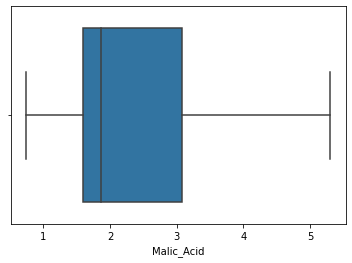

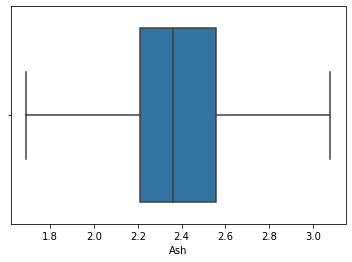

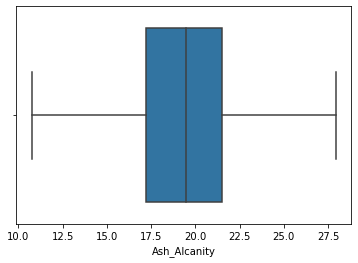

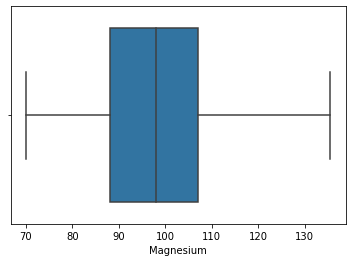

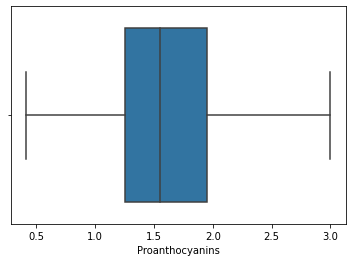

In [14]:
for x in l:
    sns.boxplot(data[x])
    plt.show()

Now the outliers are no longer in the dataset

# 2. Try out different clustering models in the wine dataset.

### 1. KMeans Clustering

In [15]:
from sklearn.cluster import KMeans

In [16]:
model1 = KMeans()
labels1 = model1.fit_predict(data)
labels1

array([5, 5, 2, 7, 4, 7, 2, 2, 5, 5, 7, 2, 2, 5, 7, 2, 2, 5, 7, 0, 4, 4,
       5, 5, 0, 0, 2, 2, 0, 5, 2, 7, 5, 2, 5, 0, 0, 5, 5, 4, 0, 5, 5, 4,
       0, 5, 5, 5, 5, 2, 5, 2, 2, 2, 5, 5, 5, 2, 2, 6, 4, 6, 1, 3, 3, 4,
       6, 6, 4, 4, 0, 3, 6, 5, 0, 6, 3, 6, 4, 6, 3, 4, 1, 6, 6, 6, 6, 1,
       4, 1, 6, 6, 6, 3, 3, 0, 1, 6, 4, 3, 4, 1, 6, 3, 4, 3, 6, 6, 3, 4,
       1, 3, 1, 6, 3, 3, 6, 3, 3, 1, 1, 6, 3, 3, 3, 3, 3, 6, 3, 1, 1, 6,
       1, 1, 1, 4, 4, 6, 1, 1, 1, 4, 6, 1, 0, 0, 3, 1, 1, 1, 6, 6, 6, 4,
       1, 4, 6, 0, 4, 1, 6, 4, 1, 4, 1, 6, 4, 4, 4, 1, 6, 6, 4, 4, 4, 0,
       0, 1])

Arbitrarily taking two variables and plotting

Text(0, 0.5, 'Hue')

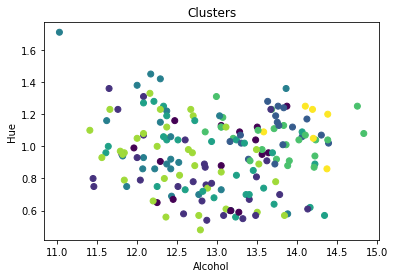

In [17]:
x = data['Alcohol']
y = data['Hue']

plt.title('Clusters')
plt.scatter(x, y, c=labels1)
plt.xlabel('Alcohol')
plt.ylabel('Hue')

### 2. Hierarchical Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering as ag

In [19]:
model2 = ag()
labels2 = model1.fit_predict(data)
labels2

array([0, 0, 7, 3, 2, 3, 7, 7, 0, 0, 3, 7, 7, 0, 3, 7, 7, 0, 3, 6, 2, 2,
       0, 0, 6, 6, 7, 7, 6, 0, 7, 3, 0, 7, 0, 6, 6, 0, 0, 2, 6, 0, 0, 2,
       6, 0, 0, 0, 0, 7, 0, 7, 7, 7, 0, 0, 0, 7, 7, 1, 2, 1, 5, 4, 4, 2,
       1, 1, 2, 2, 6, 4, 1, 0, 6, 1, 4, 1, 2, 1, 4, 2, 5, 1, 1, 1, 1, 5,
       2, 5, 1, 1, 1, 4, 4, 6, 5, 1, 2, 4, 2, 5, 1, 4, 2, 4, 1, 1, 4, 2,
       5, 4, 5, 1, 4, 4, 1, 4, 4, 5, 5, 1, 4, 4, 4, 4, 4, 1, 4, 5, 5, 1,
       5, 5, 5, 2, 2, 1, 5, 5, 5, 2, 1, 5, 6, 6, 4, 5, 5, 5, 1, 1, 1, 2,
       5, 2, 1, 6, 2, 5, 1, 2, 5, 2, 5, 1, 2, 2, 2, 5, 1, 1, 2, 2, 2, 6,
       6, 5])

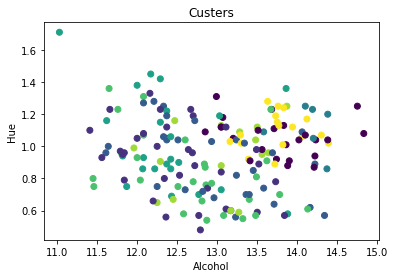

In [20]:
plt.title('Custers')
plt.scatter(x, y, c = labels2)
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.show()

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

 ### * K-Means Clustering

Finding out the optimum number of clusters using the Elbow Method

[17587968.43258769, 4539708.131287091, 2366704.8063582154, 1333151.286164057, 912621.7506171877, 643571.452190745, 408593.4940376872, 319625.6271560184, 267541.02227685764, 214636.93685554637]


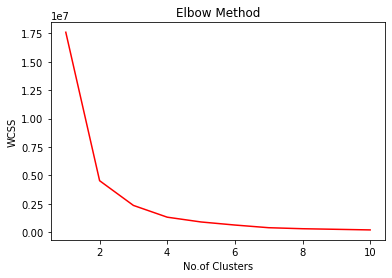

In [21]:
n = np.arange(1,11)
wcss = []

for k in n:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(n, wcss, '-r')
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.show()

From the plot we get the optimum no.of clusters = 3

In [22]:
km_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
km_labels = km_model.fit_predict(data)
km_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

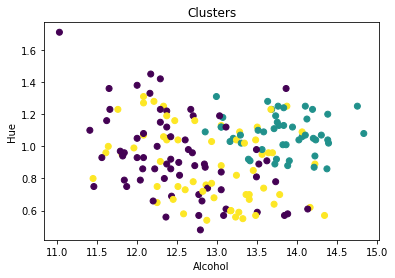

In [23]:
plt.title('Clusters')
plt.scatter(x, y, c = km_labels)
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.show()

In [24]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Assessing the performance of the model using Silhouette score

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
score = silhouette_score(data, km_labels, metric='euclidean')
print('Silhouette score : ', score)

Silhouette score :  0.571589254824698


DB index

In [27]:
from sklearn.metrics import davies_bouldin_score
print('DB index : ', davies_bouldin_score(data, km_labels))

DB index :  0.5331207335209912


## *Hierarchical Clustering

### Dendrogram

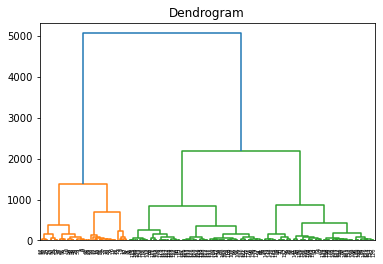

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, method = 'ward')
dendrogram(linked, orientation = 'top', show_leaf_counts = True, distance_sort = 'ascending')
plt.title('Dendrogram')
plt.show()

From the Dendrogram the optimum no.of clusters = 2

In [29]:
hc_model = ag(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc_labels = hc_model.fit_predict(data)
hc_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

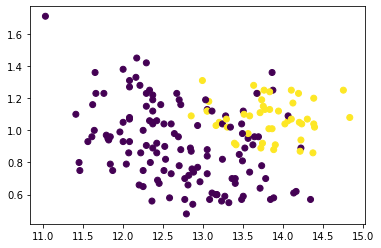

In [30]:
plt.scatter(x, y, c = hc_labels)

#### Efficiency of the model

In [31]:
print('Silhouette score : ', silhouette_score(data, hc_labels, metric = 'euclidean'))
print('DB Index : ', davies_bouldin_score(data, hc_labels))

Silhouette score :  0.6573275763933414
DB Index :  0.4563255800122296


Lower the DB index, better is the clustering.

Silhouette score close to 1 implies the clusters are dendse and well seperated.

On comparing the above two models, we get that Hierarchical clustering is better in this case.